### **Project Summary**

**Objective:**
Visualize high-dimensional image data in 2D space to explore clustering and patterns.

**Dataset:**
* MNIST handwritten digits dataset with 70,000 samples of 28×28 grayscale images (784 features).

**Methodology:**

1. **Data Preprocessing:**
   * Normalized pixel values from (0-255) to (0–1).
   * Optional sampling for computational efficiency.

2. **Dimensionality Reduction:**
   * **t-SNE**: Non-linear technique preserving local structure, good for visual clusters.
   * **UMAP**: Faster than t-SNE, preserves both local and global structure.

3. **Visualization:**
   * Scatter plots colored by digit labels show natural clustering of digits.
   * Compared t-SNE and UMAP plots to evaluate cluster separation.

**Insights / Business Impact:**
* High-dimensional data (like images) can be effectively visualized in 2D to inspect clusters and patterns.
* Helps in **data exploration** before building AI/ML pipelines.
* Can identify mislabeled data, understand latent space in neural networks, or guide **feature engineering**.


### Step 1: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap

e:\Gen AI\Unsupervised Learning\myEnv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Step 2: Load Datase

In [ ]:
# Using MNIST from openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)

print(f"Shape of data: {X.shape}")
print(f"Shape of labels: {y.shape}")

Shape of data: (70000, 784)
Shape of labels: (70000,)


### Step 3: Preprocessing

In [ ]:
# Normalize data
X_scaled = X / 255.0

# Optional: reduce sample size for faster computation
sample_size = 5000
X_sample = X_scaled[:sample_size]
y_sample = y[:sample_size]


### Step 4: t-SNE Visualization


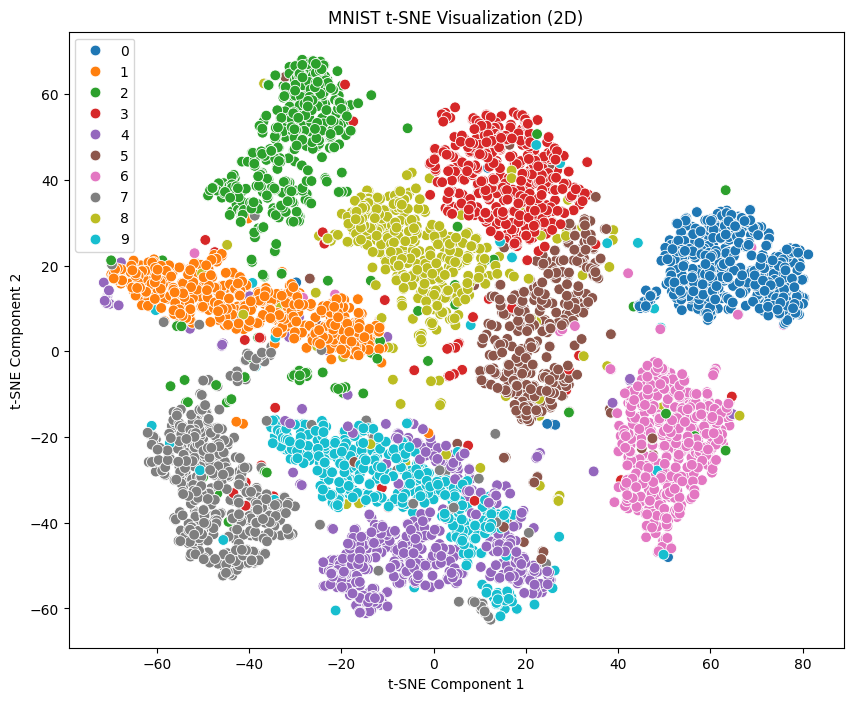

In [ ]:
# Corrected TSNE initialization
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    max_iter=1000  # changed from n_iter to max_iter
)

X_tsne = tsne.fit_transform(X_sample)

# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_sample, palette='tab10', legend='full', s=60)
plt.title("MNIST t-SNE Visualization (2D)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

### Step 5: UMAP Visualization

e:\Gen AI\Unsupervised Learning\myEnv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


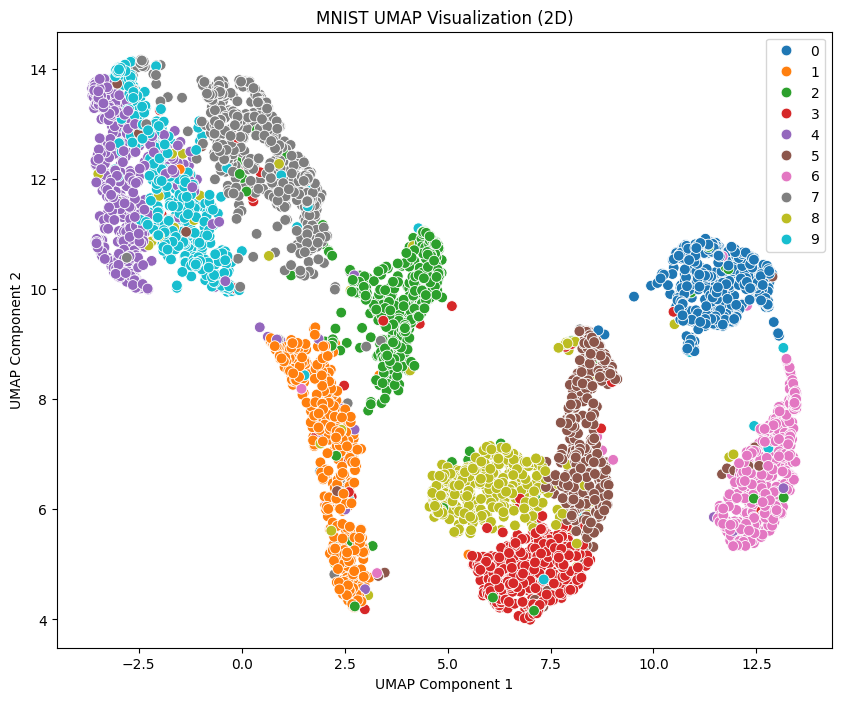

In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_sample)

# Plot UMAP results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y_sample, palette='tab10', legend='full', s=60)
plt.title("MNIST UMAP Visualization (2D)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

### Step 6: Summary Table (Optional)

In [ ]:
df_summary = pd.DataFrame({
    "Original Label": y_sample,
    "t-SNE X": X_tsne[:,0],
    "t-SNE Y": X_tsne[:,1],
    "UMAP X": X_umap[:,0],
    "UMAP Y": X_umap[:,1]
})
df_summary.head()

,Original Label,t-SNE X,t-SNE Y,UMAP X,UMAP Y
0,5,17.742655,9.137197,8.242170,6.666482
1,0,60.018246,24.143873,11.136712,10.367272
2,4,14.107420,-52.988682,-3.480063,13.343222
3,1,-62.156322,12.700493,1.379147,8.895170
4,9,-3.617576,-26.282696,-1.759272,12.011436
